In [1]:
%load_ext autoreload
%autoreload 2
from __future__ import division, print_function, absolute_import
import pickle
import os
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from edfreader import read_edf
import numpy as np
%matplotlib notebook

from lmfit.models import StepModel

In [2]:
timeStr = '2017-07-21_142241'
observer = 'laurent'
mode = 'enregistrement'

In [3]:
file = os.path.join('..', 'data', mode + '_' + observer + '_' + timeStr + '.pkl')
with open(file, 'rb') as fichier :
    exp = pickle.load(fichier, encoding='latin1')
      
resultats = os.path.join('..', 'data', mode + '_' + observer + '_' + timeStr + '.asc')
data = read_edf(resultats, 'TRIALID')

In [4]:
N_trials = exp['N_trials']
N_blocks = exp['N_blocks']
screen_width_px = exp['screen_width_px']
screen_height_px = exp['screen_height_px']
V_X = exp['V_X']
RashBass = exp['RashBass']
stim_tau = exp['stim_tau']
p = exp['p']

https://lmfit.github.io/lmfit-py/index.html

<IPython.core.display.Javascript object>


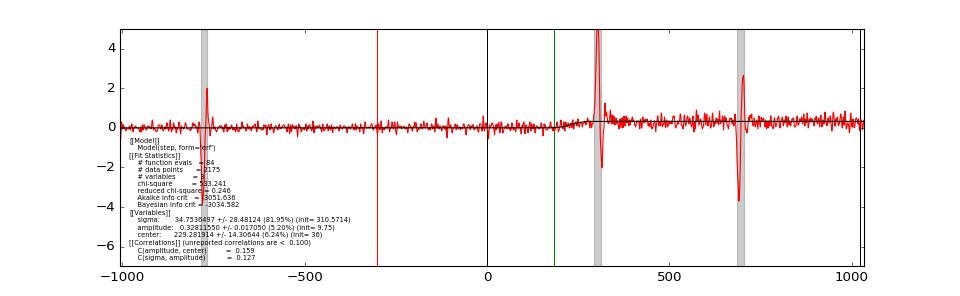

latence =  184
[[Model]]
    Model(step, form='erf')
[[Fit Statistics]]
    # function evals   = 84
    # data points      = 2175
    # variables        = 3
    chi-square         = 533.241
    reduced chi-square = 0.246
    Akaike info crit   = -3051.636
    Bayesian info crit = -3034.582
[[Variables]]
    sigma:       34.7536497 +/- 28.48124 (81.95%) (init= 310.5714)
    amplitude:   0.32811550 +/- 0.017050 (5.20%) (init= 9.75)
    center:      229.281914 +/- 14.30644 (6.24%) (init= 36)
[[Correlations]] (unreported correlations are <  0.100)
    C(amplitude, center)         =  0.159 
    C(sigma, amplitude)          =  0.127 



In [5]:
trial = 0
block = 0
trial_data = trial + N_trials*block

data_x = data[trial_data]['x']

trackertime = data[trial_data]['trackertime']
StimulusOn = data[trial_data]['events']['msg'][10][0]
StimulusOf = data[trial_data]['events']['msg'][14][0]
TargetOn = data[trial_data]['events']['msg'][15][0]
TargetOff = data[trial_data]['events']['msg'][16][0]
saccades = data[trial_data]['events']['Esac']

start = TargetOn

StimulusOn = StimulusOn - start
StimulusOf = StimulusOf - start
TargetOn = TargetOn - start
TargetOff = TargetOff - start
trackertime = trackertime - start

gradient_x = np.gradient(data_x)
mod =  StepModel(form='erf')
pars = mod.guess(gradient_x, x=trackertime) 
out = mod.fit(gradient_x, pars, x=trackertime)

fig, ax = plt.subplots(1, 1, figsize=(12, ((12/2)/1.6180)))

ax.axis([StimulusOn-10, TargetOff+10, -7, 5])
ax.plot(trackertime, gradient_x, color='r')
#ax.plot(trackertime, out.init_fit, 'k--')
ax.plot(trackertime, out.best_fit, color='k')


for s in range(len(saccades)) :
    ax. axvspan(saccades[s][0]-start, saccades[s][1]-start, color='k', alpha=0.2)

liste_l =[]
dir_bool = p[trial, block, 0]*2 - 1
for tps in range(len(trackertime)) :
    if dir_bool*out.best_fit[tps] >= 0.01 :
        liste_l.append(trackertime[tps])
if len(liste_l)!=0:
    latence = liste_l[0]
    ax.bar(latence, 12, bottom=-7, color='g', width=2, linewidth=0)
    print('latence = ', latence)
else:
    ax.text(StimulusOf+100, 3.5, "PAS DE LATENCE !", color='r', fontsize=15)

ax.text(StimulusOn+15, -7, "%s"%(out.fit_report()), color='k', fontsize=6)


ax.bar(StimulusOn, 12, bottom=-7, color='r', width=2, linewidth=0)
ax.bar(StimulusOf, 12, bottom=-7, color='r', width=2, linewidth=0)

ax.bar(TargetOn, 12, bottom=-7, color='k', width=2, linewidth=0)
ax.bar(TargetOff, 12, bottom=-7, color='k', width=2, linewidth=0)

print(out.fit_report())

In [6]:
for block in range(N_blocks) :
    fig_width= 12
    fig, axs = plt.subplots(N_trials, 1, figsize=(fig_width, (fig_width*(N_trials/2))/1.6180))

    for trial in range(N_trials) :
        trial_data = trial + N_trials*block

        data_x = data[trial_data]['x']
        data_y = data[trial_data]['y']
        trackertime = data[trial_data]['trackertime']

        StimulusOn = data[trial_data]['events']['msg'][10][0]
        StimulusOf = data[trial_data]['events']['msg'][14][0]
        TargetOn = data[trial_data]['events']['msg'][15][0]
        TargetOff = data[trial_data]['events']['msg'][16][0]
        saccades = data[trial_data]['events']['Esac']

        start = TargetOn

        StimulusOn = StimulusOn - start
        StimulusOf = StimulusOf - start
        TargetOn = TargetOn - start
        TargetOff = TargetOff - start
        trackertime = trackertime - start



        gradient_data = np.gradient(data_x)
        mod =  StepModel(form='erf')
        pars = mod.guess(gradient_data, x=trackertime) 
        out = mod.fit(gradient_data, pars, x=trackertime)

        
        axs[trial].cla() # pour remettre ax figure a zero
        axs[trial].axis([StimulusOn-10, TargetOff+10, -6, 6])
        axs[trial].plot(trackertime, gradient_data, color='r')
        #axs[trial].plot(x, out.init_fit, 'k--')
        axs[trial].plot(trackertime, out.best_fit, color='k')

        axs[trial].bar(StimulusOn, 12, bottom=-6, color='r', width=2, linewidth=0)
        axs[trial].bar(StimulusOf, 12, bottom=-6, color='r', width=2, linewidth=0)
        axs[trial].bar(TargetOn, 12, bottom=-6, color='k', width=2, linewidth=0)
        axs[trial].bar(TargetOff, 12, bottom=-6, color='k', width=2, linewidth=0)
        for s in range(len(saccades)) :
            axs[trial]. axvspan(saccades[s][0]-start, saccades[s][1]-start, color='k', alpha=0.2)

        liste_l =[]
        dir_bool = p[trial, block, 0]*2 - 1
        for tps in range(len(trackertime)) :
            if dir_bool*out.best_fit[tps] >= 0.01 :
                liste_l.append(trackertime[tps])
        if len(liste_l)!=0:
            latence = liste_l[0]
            axs[trial].bar(latence, 12, bottom=-6, color='g', width=2, linewidth=0)
        else:
            axs[trial].text(StimulusOf+100, 3.5, "PAS DE LATENCE !", color='r', fontsize=15)

        axs[trial].text(StimulusOn+15, -6, "%s"%(out.fit_report()), color='k', fontsize=6)
        
        axs[trial].set_xlabel('Time (ms)', fontsize=9)
        axs[trial].set_ylabel(trial+1, fontsize=9)

    plt.tight_layout() # pour supprimer les marge trop grande
    plt.subplots_adjust(hspace=0) # pour enlever espace entre les figures

    plt.savefig('figures/Fit_%s_%s_block-%s_%s-trials.pdf'%(observer, timeStr, block+1, N_trials))
plt.close()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>